## Importing Libraries

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

## Reading Data

In [92]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* **RowNumber**: Index of the row.
* **CustomerId**: Unique identifier for each customer.
* **Surname**: Customer's last name (may not be very useful for analysis).
* **CreditScore**: The credit score of the customer [300 : 850].
    - Poor credit: 300 to 579.
    - Fair credit: 580 to 669.
    - Good credit: 670 to 739.
    - Very good credit: 740 to 799.
    - Excellent credit: 800 to 850.
* **Geography**: Country of the customer (e.g., France, Spain).
* **Gender**: Gender of the customer (e.g., Male, Female).
* **Age**: Age of the customer.
* **Tenure**: Number of years the customer has been with the bank.
* **Balance**: Account balance of the customer.
* **NumOfProducts**: Number of products the customer has purchased.
* **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).
* **IsActiveMember**: Whether the customer is an active member (1 = Yes, 0 = No).
* **EstimatedSalary**: Estimated annual salary of the customer.
* **Exited**: Whether the customer left the bank (1 = Yes, 0 = No) — this is likely the target for churn prediction.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Wrangling

**Check Duplicated Values** 

In [94]:
df.duplicated().sum()

0

**Check Missing Values**

In [95]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [96]:
df.shape

(10000, 14)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [98]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [99]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Exploratory Data Analysis

### **Univariate Analysis**

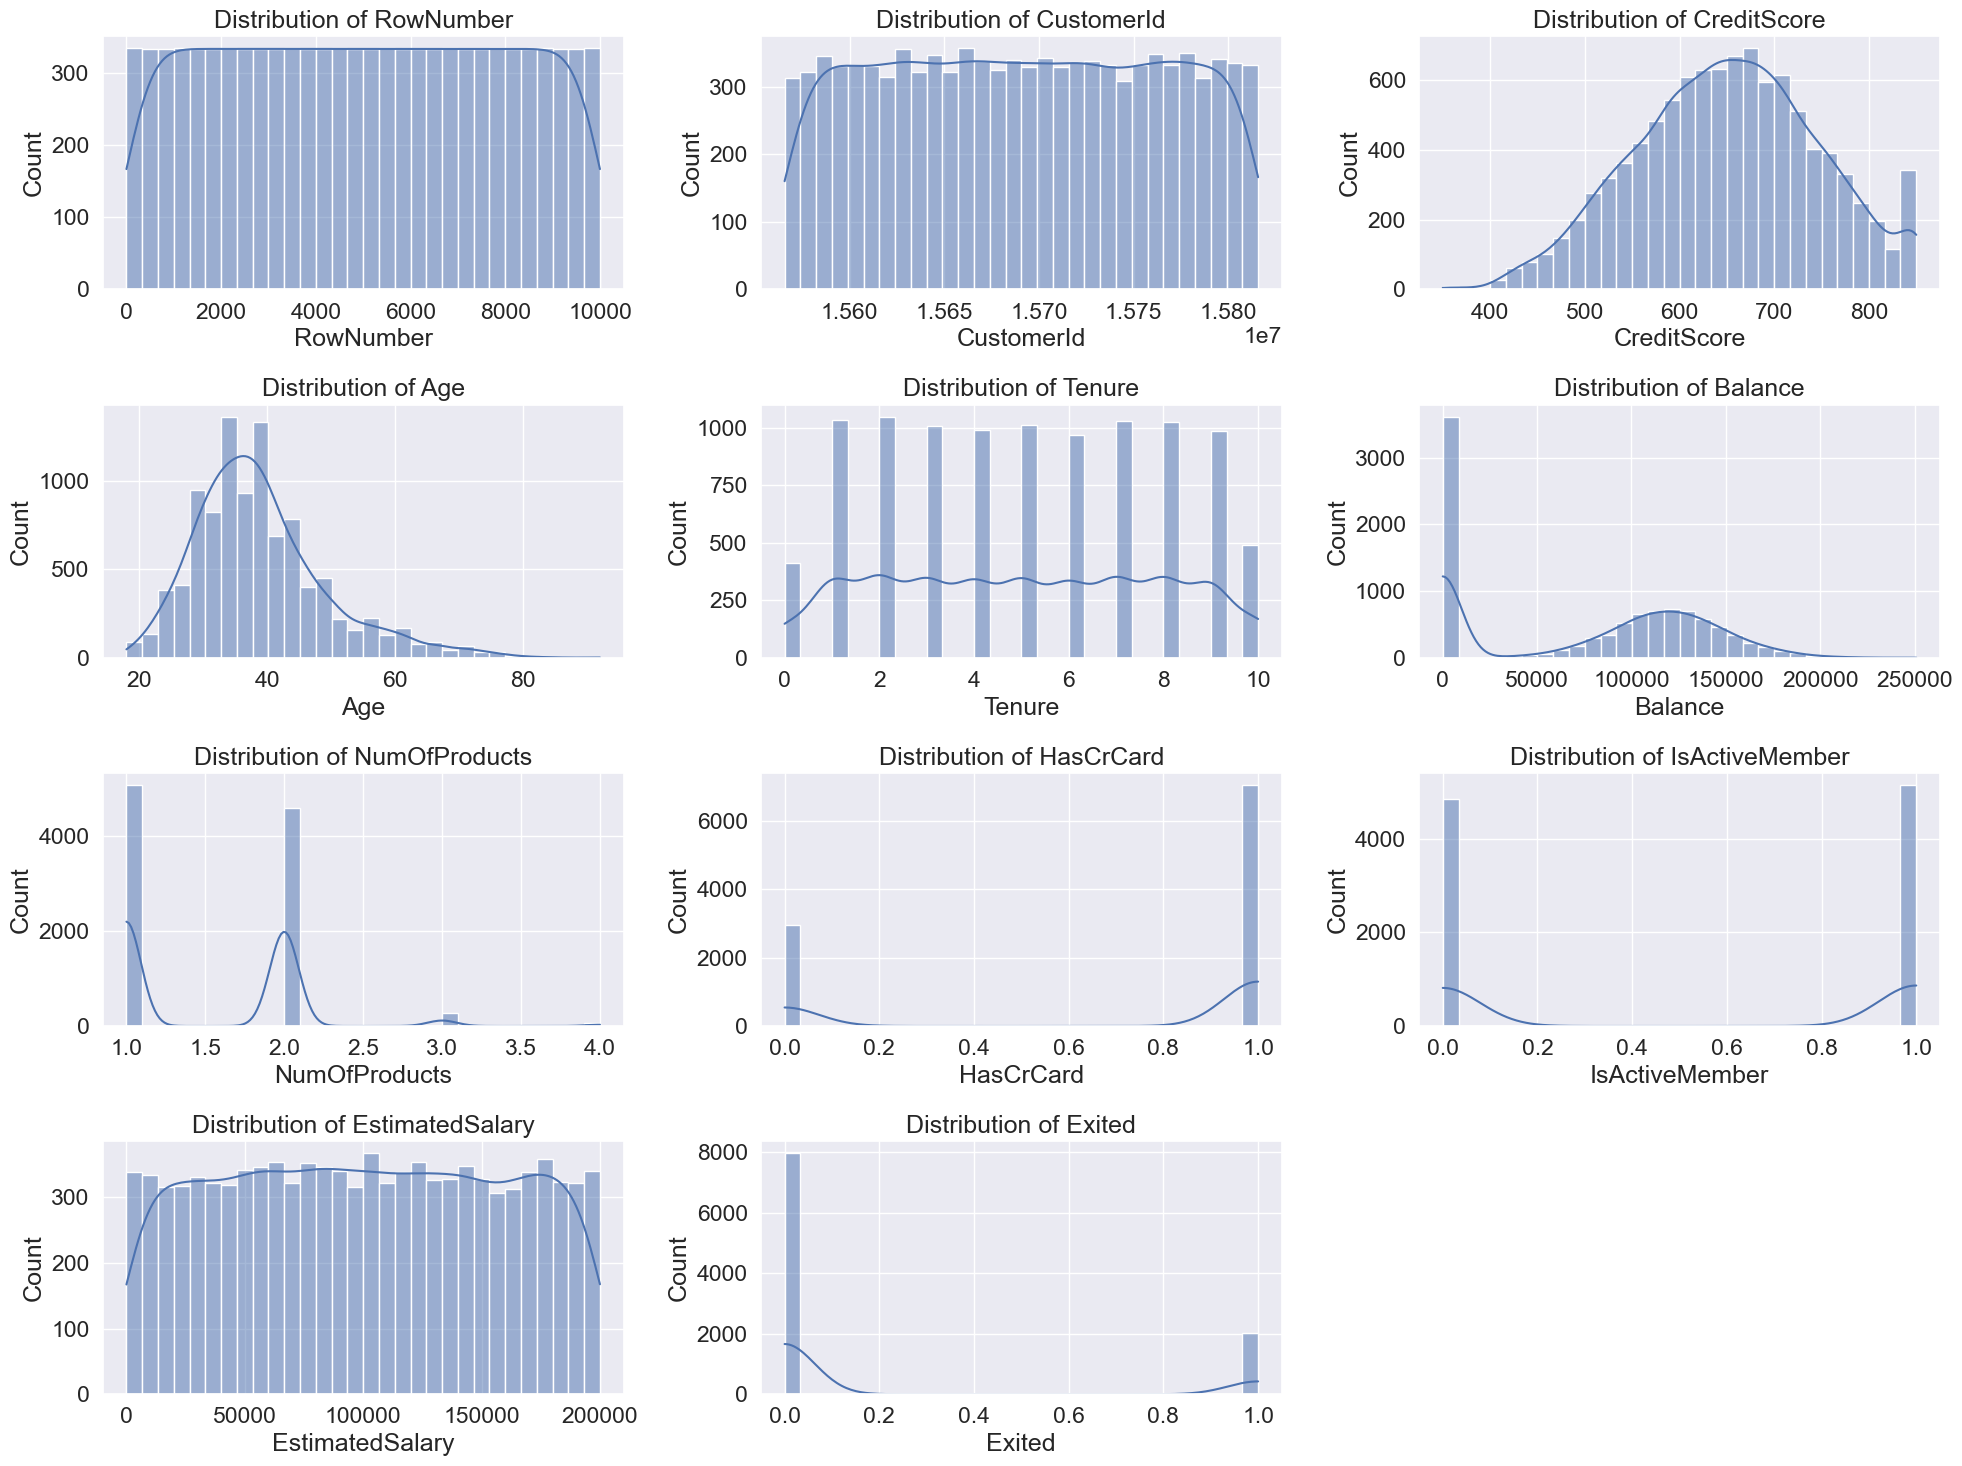

In [100]:
# Plotting distributions of numerical columns
numerical = []
for i in df.columns:
    numerical = df.select_dtypes(include=['int64', 'float64']).columns

    
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Credit Score Distribution**
- The distribution of credit scores is slightly skewed to the right, meaning more customers have higher credit scores (closer to 800).
- This could indicate that most customers have a good credit history.

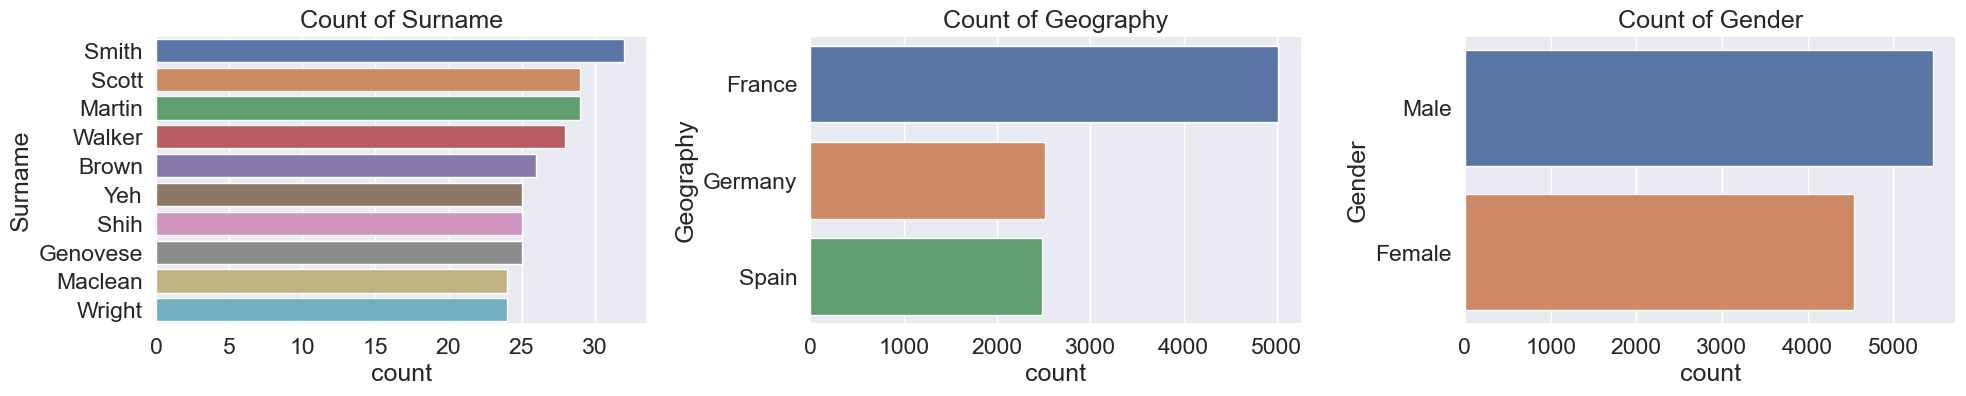

In [101]:
# Plotting value counts of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

**Geography Column**

In [102]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

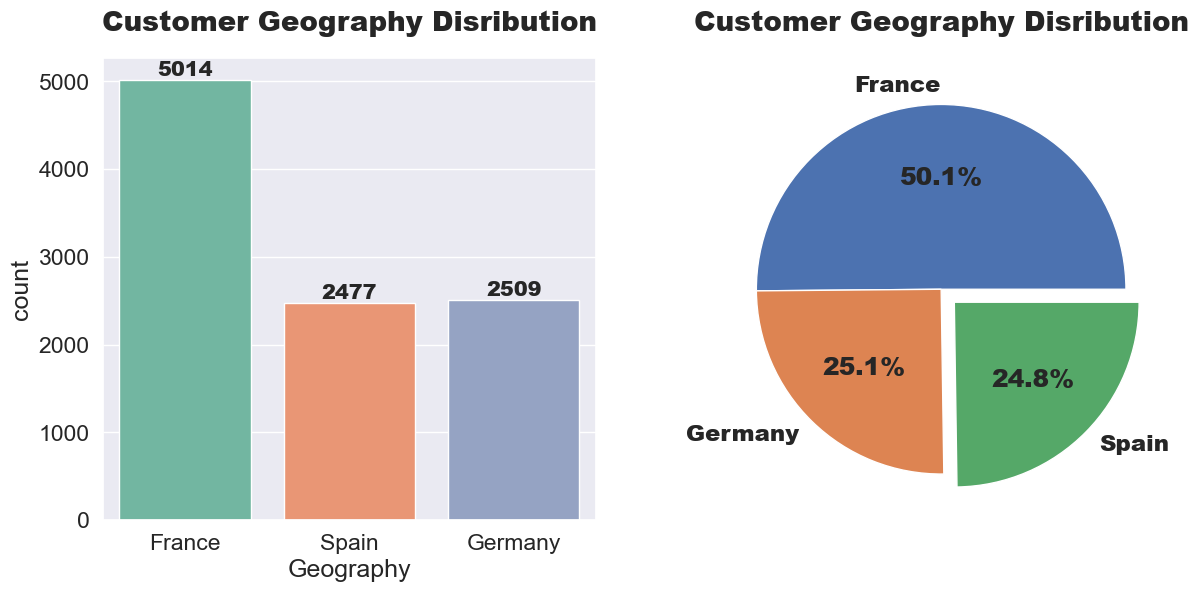

In [103]:
count = df["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

**Gender Column**

In [104]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

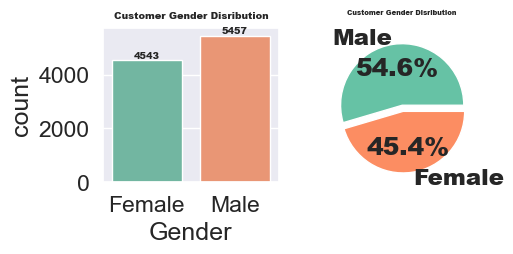

In [105]:
count = df["Gender"].value_counts()

plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=7)
plt.title("Customer Gender Disribution",fontweight="black",size=7,pad=7)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=5,pad=10)
plt.show()

**Age Column**

In [106]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

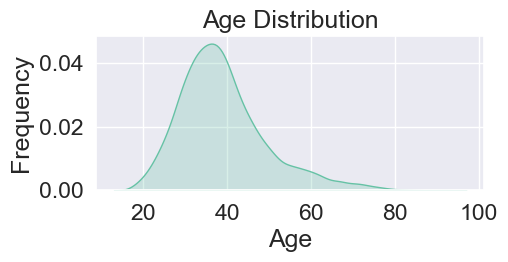

In [107]:
plt.figure(figsize=(5, 2))

sns.kdeplot(df['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

- The age distribution is concentrated around 30–50 years, with fewer customers in the older age range.
- This suggests that most customers are middle-aged, which might be relevant depending on the bank’s target demographic.

**Tenure Column**

In [108]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

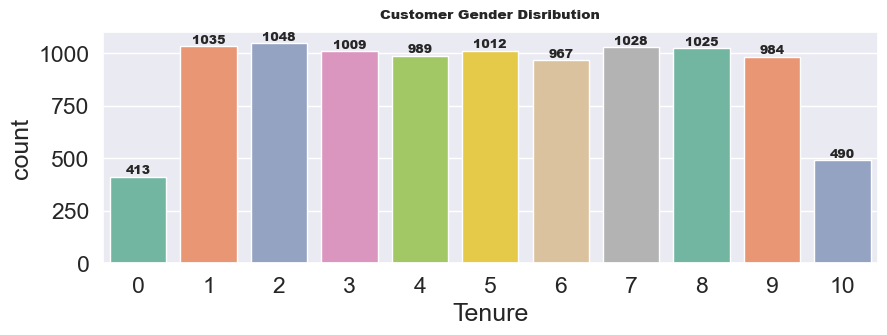

In [109]:
plt.figure(figsize=(10,3))

ax=sns.countplot(data=df, x="Tenure",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=9)
plt.title("Customer Gender Disribution",fontweight="black",size=10,pad=10)

plt.show()

- The uniform distribution suggests that the bank has a balanced customer base across different tenure lengths.

**Balance Column**

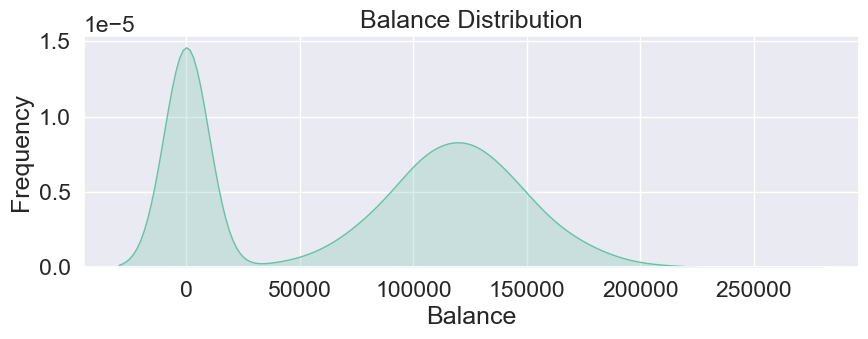

In [110]:
plt.figure(figsize=(10, 3))

sns.kdeplot(df['Balance'], fill=True, palette="Set2")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

- A bimodal distribution in the Balance column suggests two distinct customer segments:
  - Low-balance customers who may be more likely to churn.
  - High-balance customers who are likely more engaged and loyal.

**NumOfProducts Column**

In [111]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

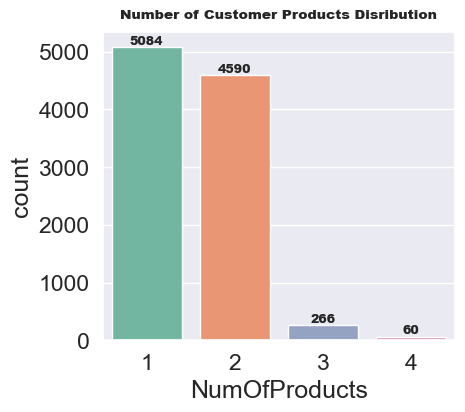

In [112]:
count = df["NumOfProducts"].value_counts()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=9)
plt.title("Number of Customer Products Disribution",fontweight="black",size=10,pad=10)

plt.show()

**HasCrCard Column**

In [113]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

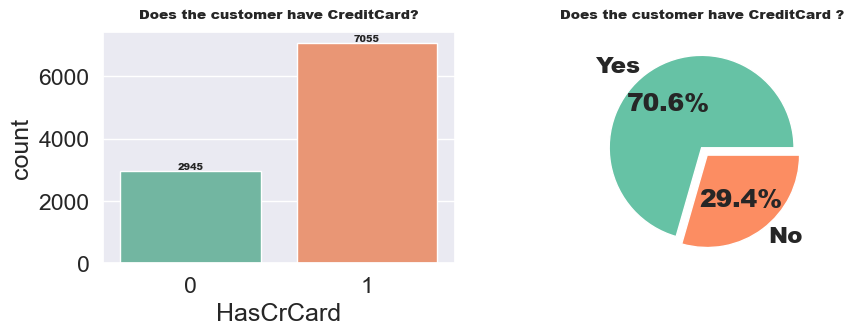

In [114]:
count = df["HasCrCard"].value_counts()

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="HasCrCard",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=7)
plt.title("Does the customer have CreditCard?",fontweight="black",size=10,pad=10)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Does the customer have CreditCard ?",fontweight="black",size=10,pad=10)
plt.show()

**IsActiveMember Column**

In [115]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

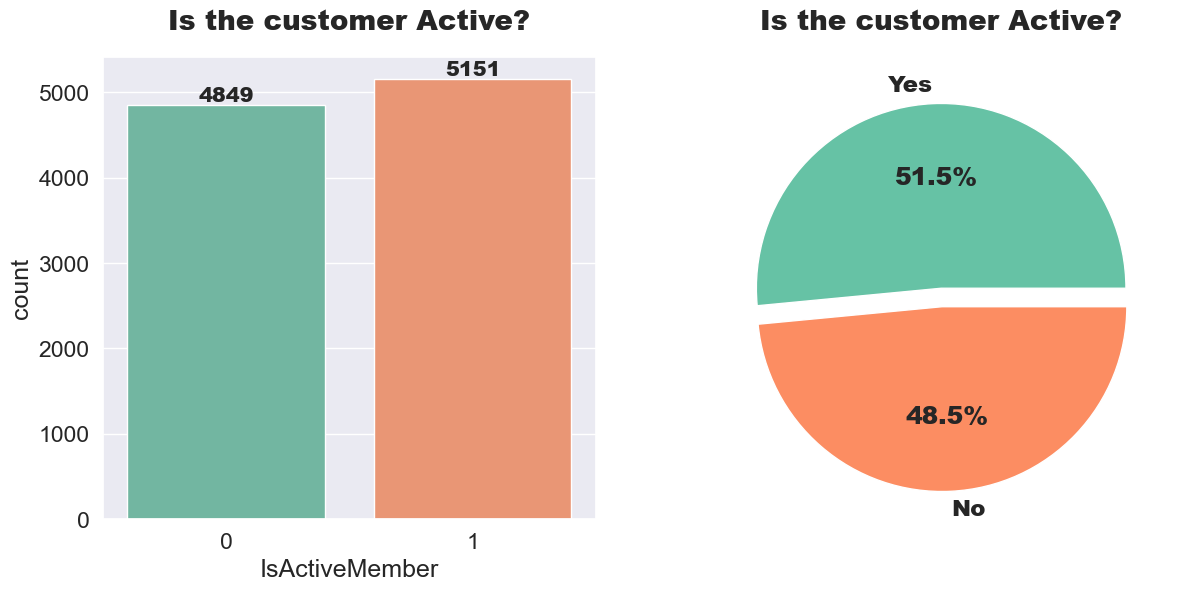

In [116]:
count = df["IsActiveMember"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="IsActiveMember",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Is the customer Active?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Is the customer Active?",fontweight="black",size=20,pad=20)
plt.show()

**EstimatedSalary**

In [117]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

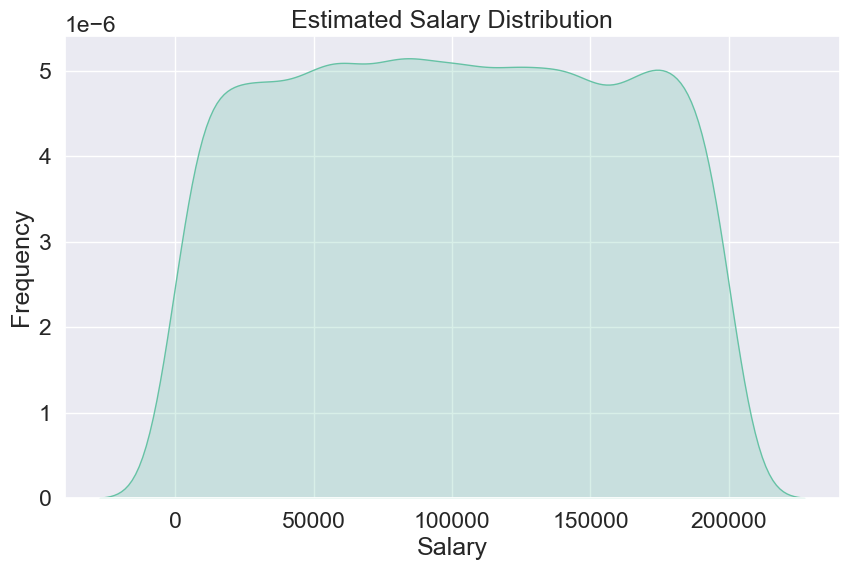

In [118]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

**Exited Column**

In [119]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

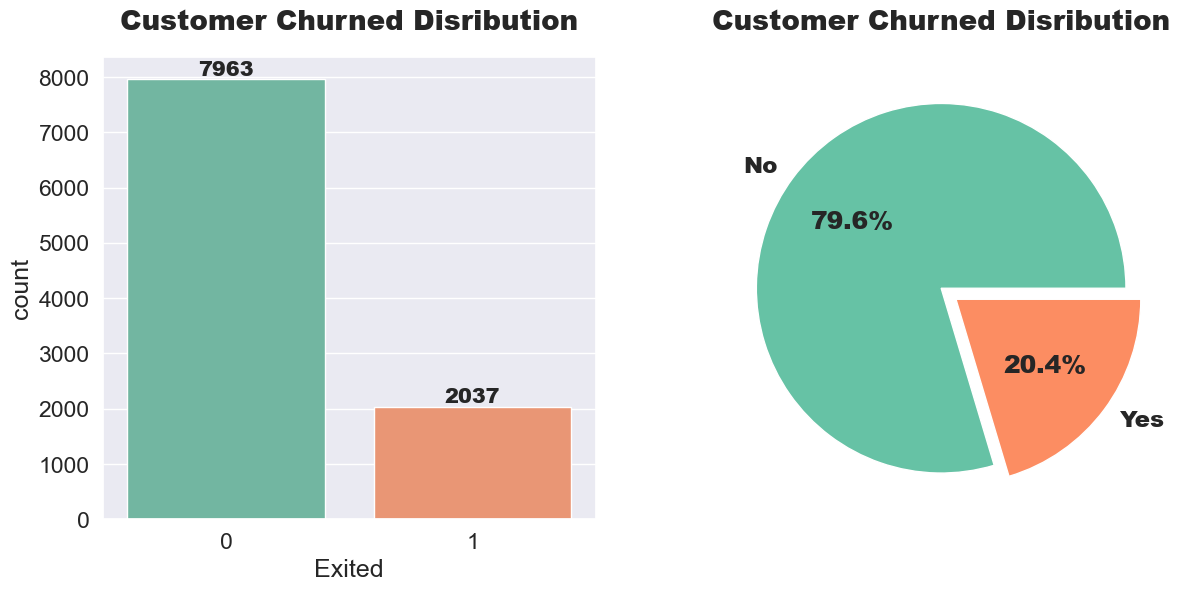

In [121]:
count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Exited",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

## **Bivariate Analysis**

**Numerical Features vs. Churn (Exited)**

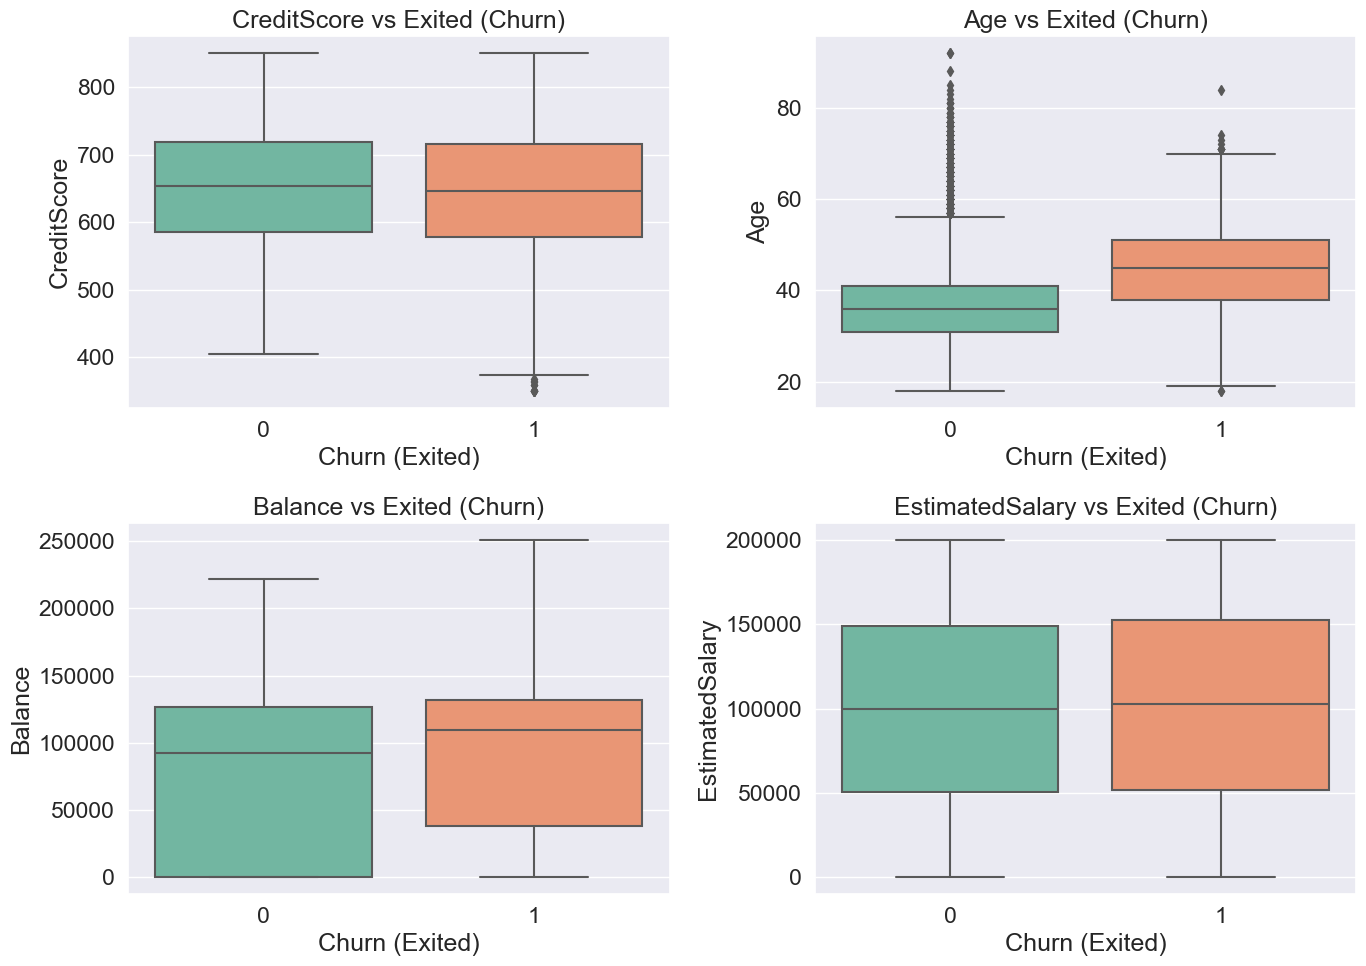

In [122]:
# List of numerical features to analyze
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**Categorical Features vs. Churn (Exited)**

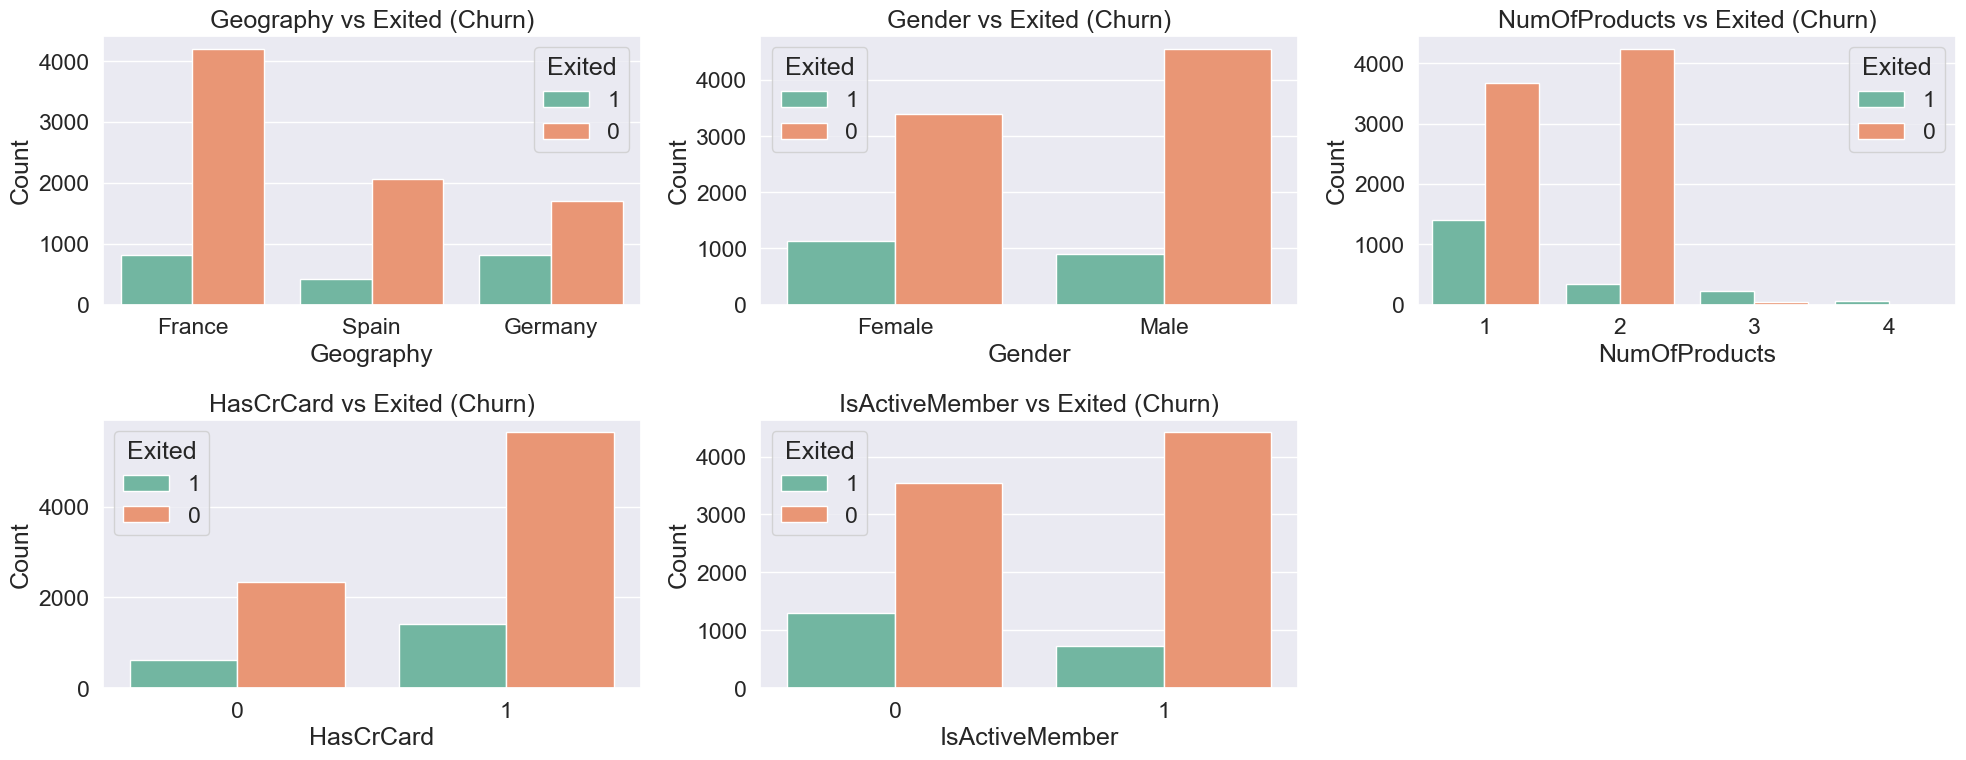

In [123]:
# List of categorical features to analyze
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
df['Exited'] = df['Exited'].astype(str)

# Plotting the relationship between each categorical feature and churn (Exited)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## **Multivariate Analysis**

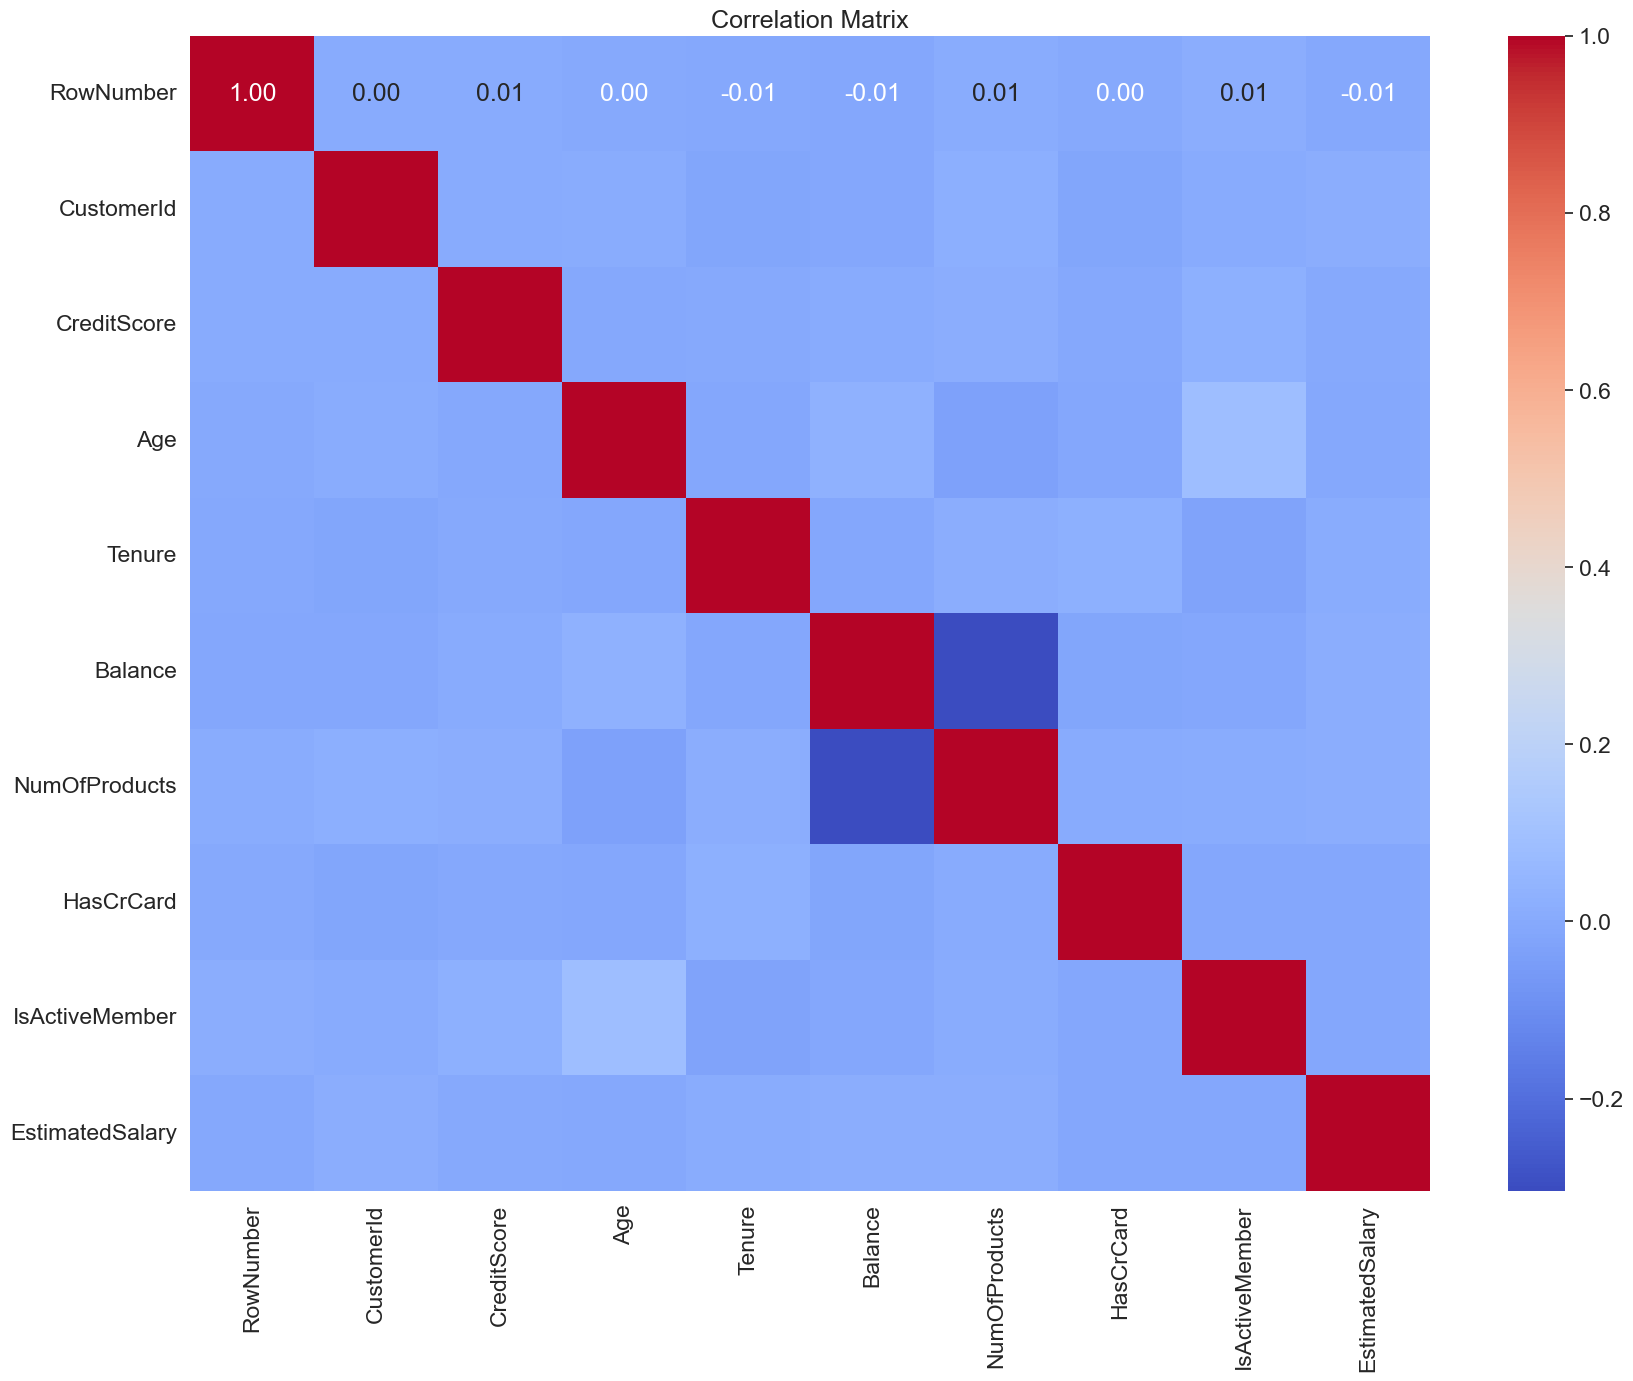

In [124]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Finding Outliers**

In [125]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

### **Visualising Outliers**

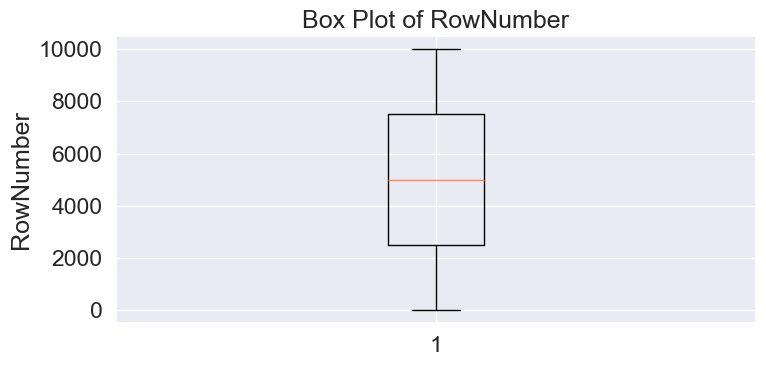

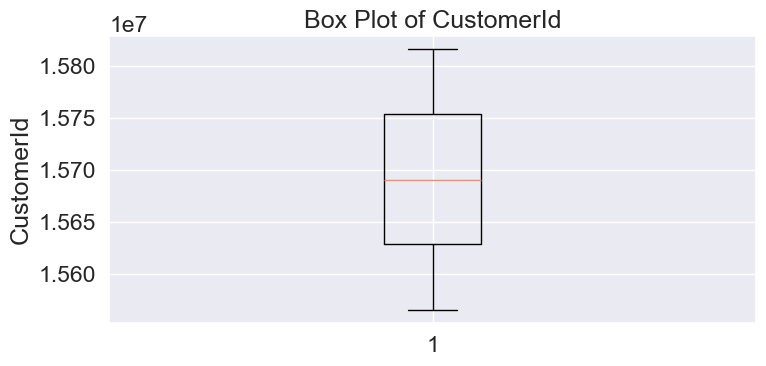

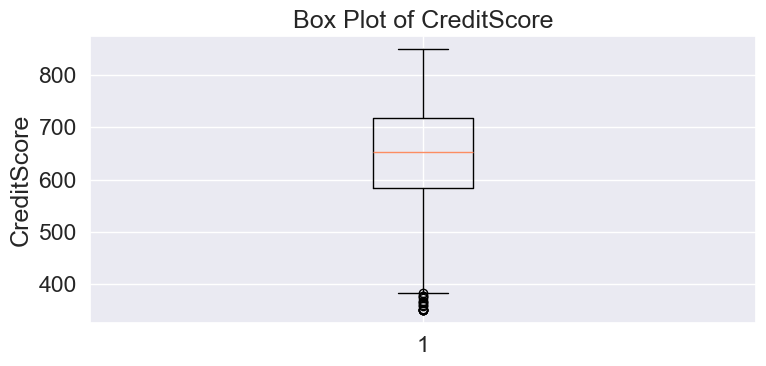

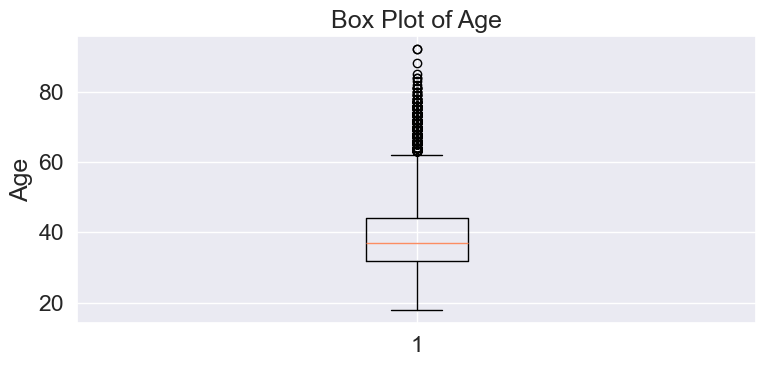

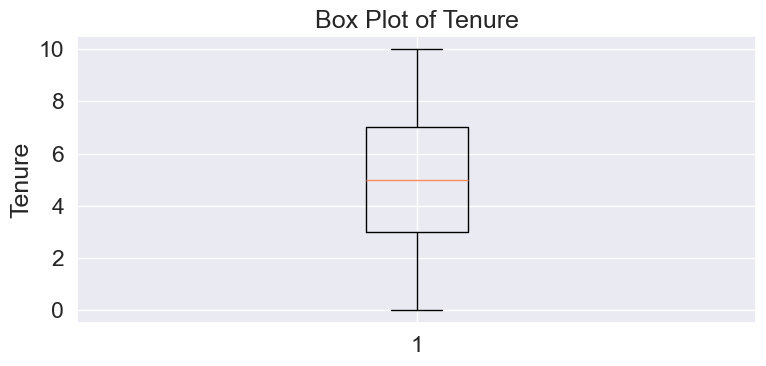

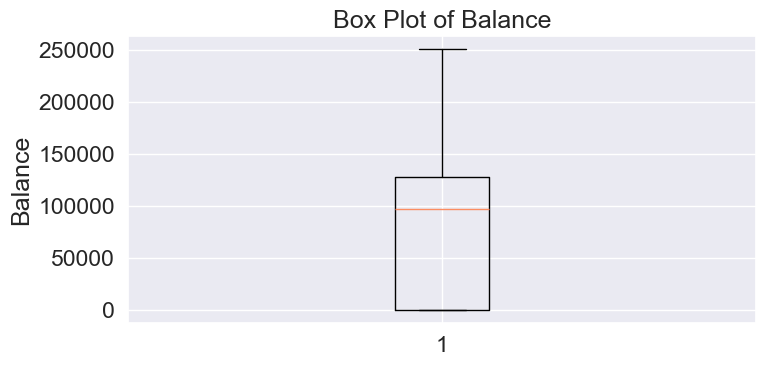

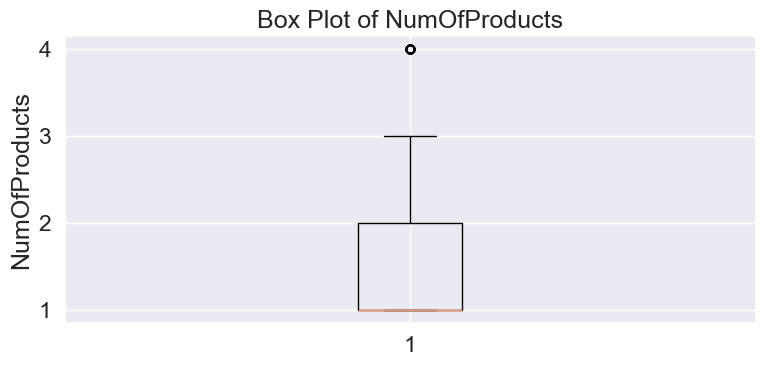

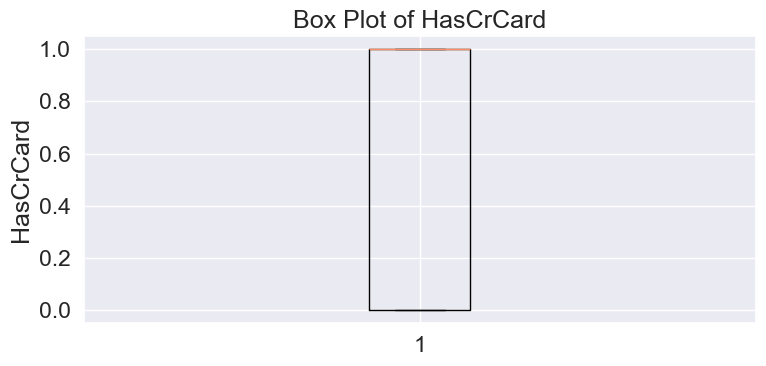

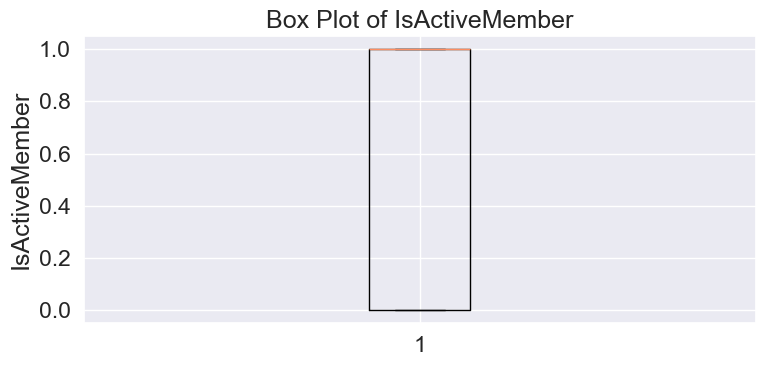

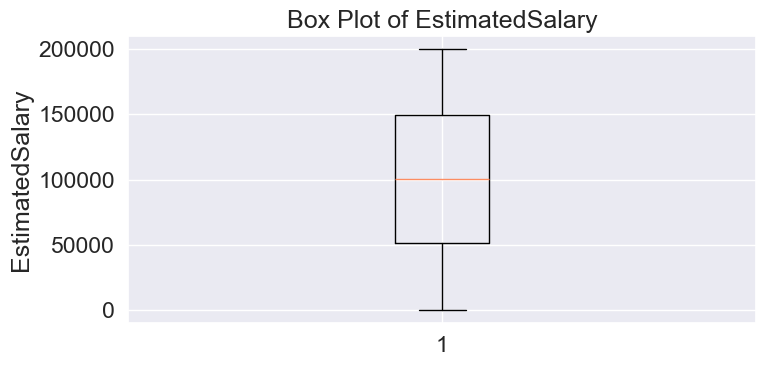

In [126]:
for column in numeric_data:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### **Handling Outliers by Capping it with IQR Method**

In [127]:
def cap_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return column

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = np.delete(numeric_columns, np.where(numeric_columns == 'Exited'))

outlier_columns = []
for col in numeric_columns:
    capped_column = cap_outliers_iqr(df[col])
    if not capped_column.equals(df[col]):
        outlier_columns.append(col)
    df[col] = capped_column

### **Checking columns after Handling Outliers**

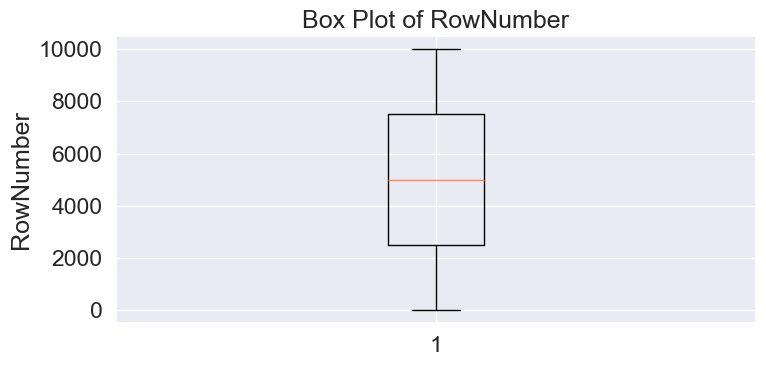

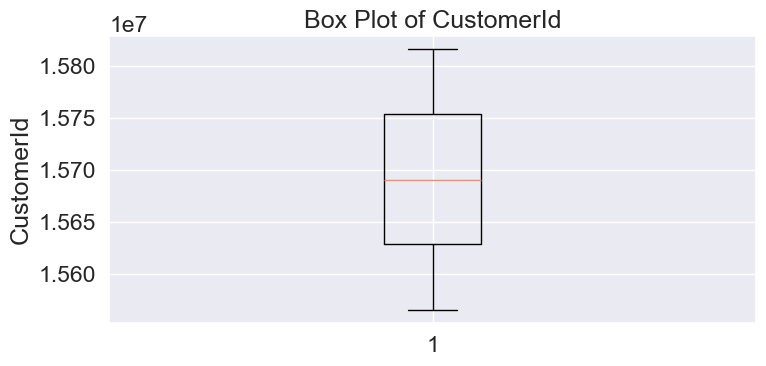

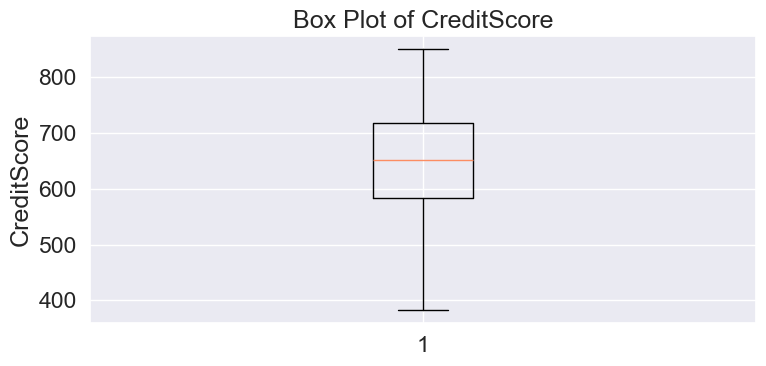

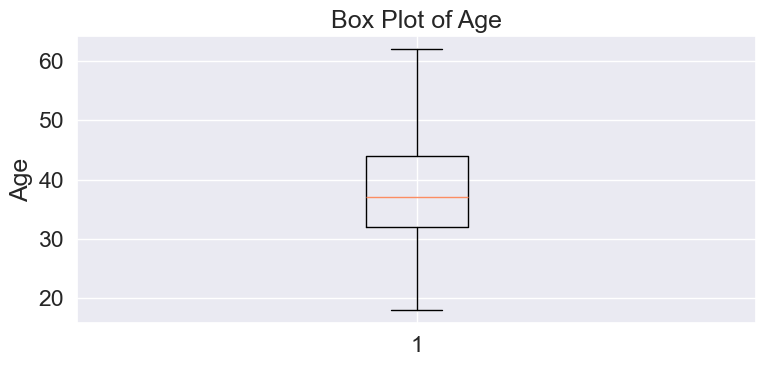

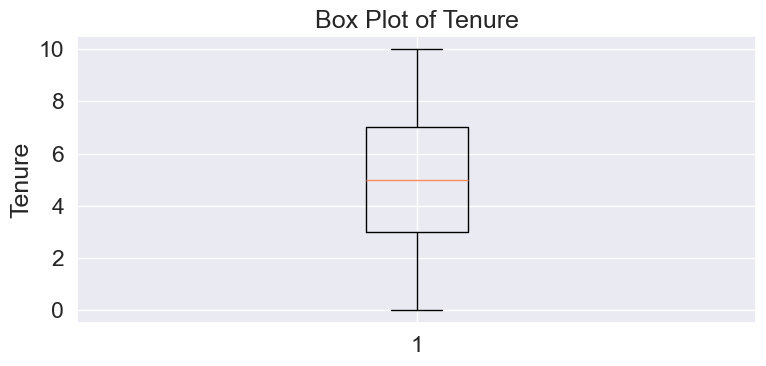

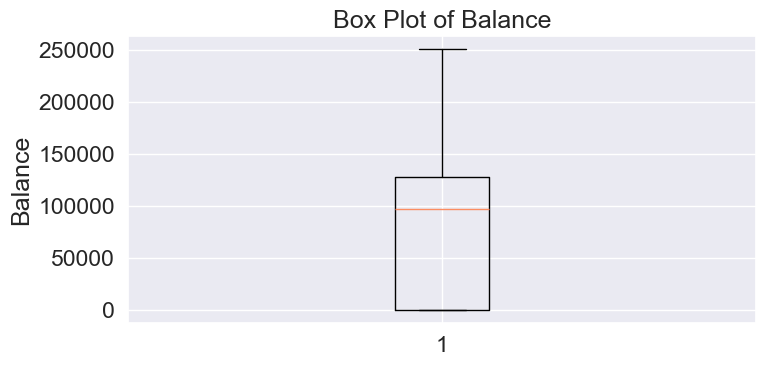

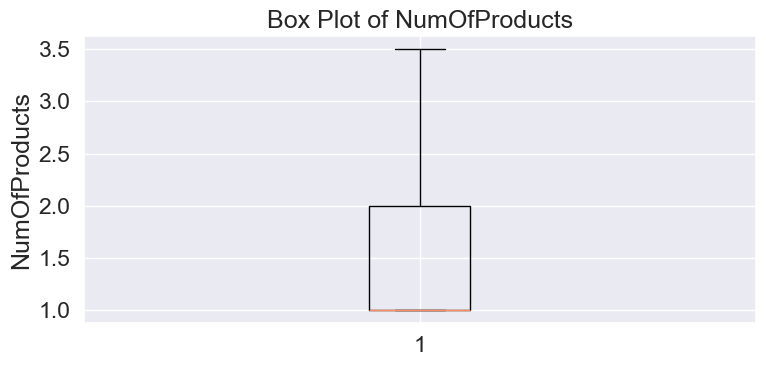

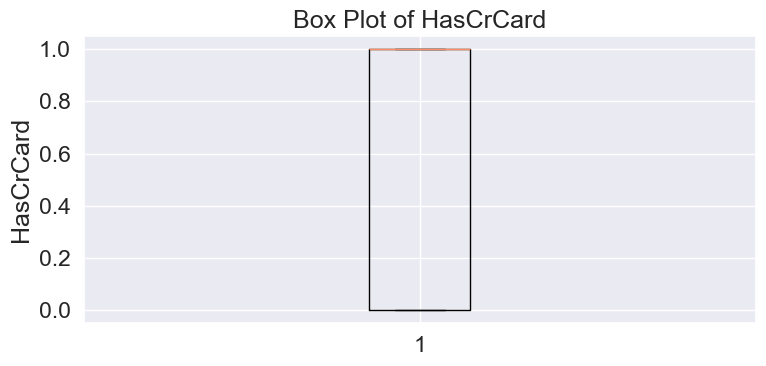

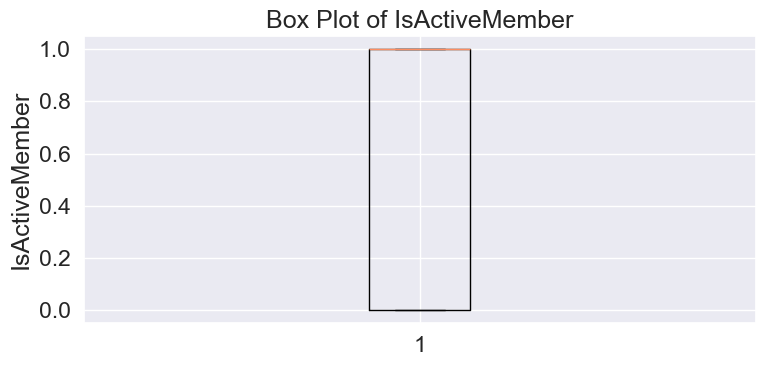

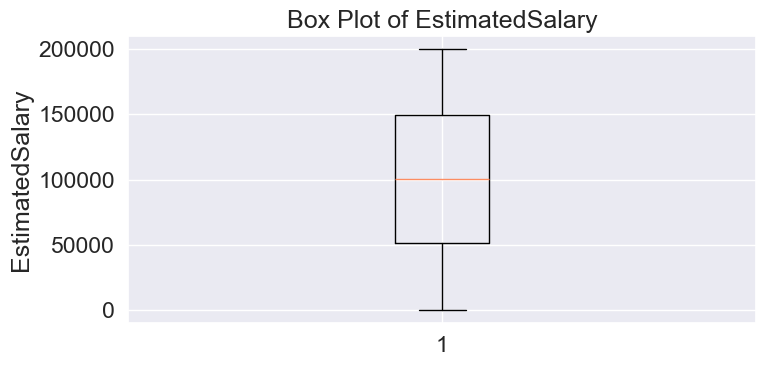

In [128]:
for column in numeric_data:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Data Pre-Processing

#### Dropping Insignificant Columns

In [129]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0


In [130]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0


In [131]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target variable

In [134]:
# Identify Numerical & Categorical Columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns = ['Geography', 'Gender']

In [135]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [136]:
y.astype(int)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int32

In [137]:
# Split Data First (Before Scaling!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [138]:
X_train.info(), X_test.info(), y_train.info(), y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 2151 to 6206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   float64
 1   Geography        8000 non-null   object 
 2   Gender           8000 non-null   object 
 3   Age              8000 non-null   float64
 4   Tenure           8000 non-null   int64  
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   float64
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 5702 to 3776
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2000 non-null   float64
 1   Geography        2000 non-null 

(None, None, None, None)

In [139]:
y_train.astype(int), y_test.astype(int)

(2151    1
 8392    1
 5006    0
 4117    0
 7182    0
        ..
 4555    1
 4644    0
 8942    0
 2935    0
 6206    0
 Name: Exited, Length: 8000, dtype: int32,
 5702    0
 3667    0
 1617    0
 5673    0
 4272    0
        ..
 5768    0
 833     0
 9719    1
 2776    0
 3776    0
 Name: Exited, Length: 2000, dtype: int32)

In [140]:
# One-Hot Encoding for Categorical Features (Fitting Only Training Data)
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

In [141]:
# Scaling Numerical Features (Fitting Only Training Data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

In [142]:
# Combine Encoded & Scaled Features
X_train_final = np.hstack((X_train_scaled, X_train_encoded))
X_test_final = np.hstack((X_test_scaled, X_test_encoded))

In [143]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# **Model Building**

### **Logistic Regression model**

In [144]:
lr = LogisticRegression(penalty=None, C=1.0, max_iter=1000)

# Train the model
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, penalty=None)

In [145]:
# Train Score
print(lr.score(X_train_resampled, y_train_resampled))

0.7112244897959183


In [146]:
# Test Score
print(lr.score(X_test_final, y_test))

0.703


In [147]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test_final)

In [230]:
y_pred_lr = y_pred_lr.astype(int)

In [231]:
# Get our metrics
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_per = precision_score(y_test, y_pred_lr)
lr_rec = recall_score(y_test, y_pred_lr)

In [148]:
# Evaluate Model Performance
print("\n🔹 Model Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")


🔹 Model Performance:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1593
           1       0.37      0.67      0.48       407

    accuracy                           0.70      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.70      0.73      2000

✅ Accuracy: 0.7030


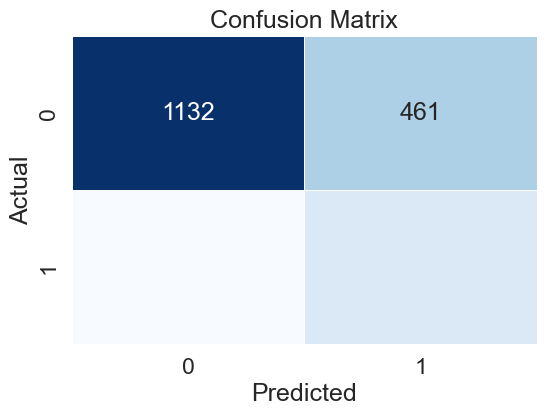

In [149]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **SVC model**

In [150]:
# Define hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10]}

svm = SVC()

In [151]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [152]:
# Get best model
best_model = grid_search.best_estimator_
best_model

SVC(C=10)

In [153]:
best_model.fit(X_train_resampled, y_train_resampled)

SVC(C=10)

In [154]:
y_pred_svc = best_model.predict(X_test_final)

In [233]:
y_pred_svc = y_pred_svc.astype(int)

In [234]:
# Get our metrics
svc_acc = accuracy_score(y_test, y_pred_svc)
svc_per = precision_score(y_test, y_pred_svc)
svc_rec = recall_score(y_test, y_pred_svc)

In [155]:
# Evaluate Model Performance
print("\n🔹 Model Performance:")
print(classification_report(y_test, y_pred_svc))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")


🔹 Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.47      0.67      0.56       407

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.78      0.79      2000

✅ Accuracy: 0.7820


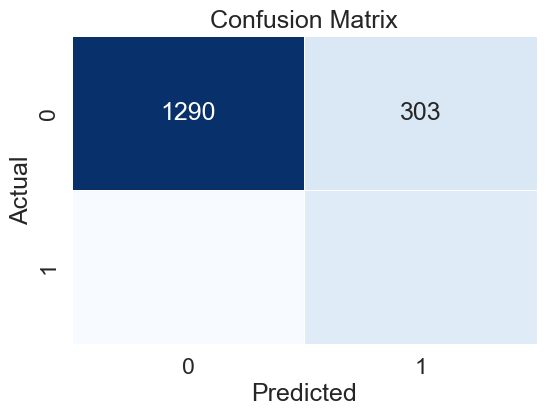

In [156]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**KNN Model**

In [157]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [158]:
model_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [159]:
y_pred_knn = model_knn.predict(X_test_final)

In [235]:
y_pred_knn = y_pred_knn.astype(int)

In [236]:
# Get our metrics
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_per = precision_score(y_test, y_pred_knn)
knn_rec = recall_score(y_test, y_pred_knn)

In [160]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1593
           1       0.42      0.66      0.51       407

    accuracy                           0.74      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.74      0.76      2000



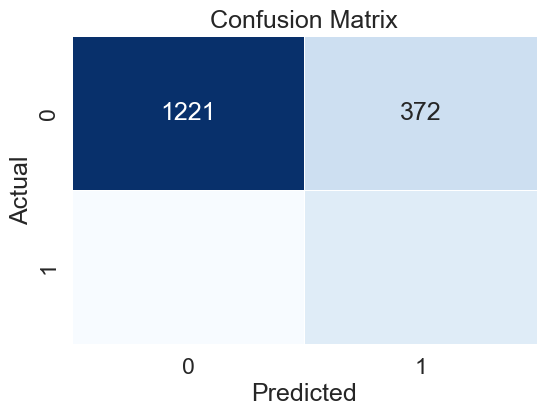

In [161]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree Classifier**

In [168]:
y_train_resampled = y_train_resampled.astype(int)

In [169]:
class_weights = {0: 1, 1: 3}

In [170]:
model_dt = DecisionTreeClassifier(class_weight= class_weights,max_depth=4, min_impurity_decrease=0.01, random_state=42)
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=4,
                       min_impurity_decrease=0.01, random_state=42)

In [171]:
y_pred_dt = model_dt.predict(X_test_final)

In [237]:
# Get our metrics
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_per = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)

In [185]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.53      0.67      1593
           1       0.31      0.82      0.45       407

    accuracy                           0.59      2000
   macro avg       0.61      0.67      0.56      2000
weighted avg       0.80      0.59      0.63      2000



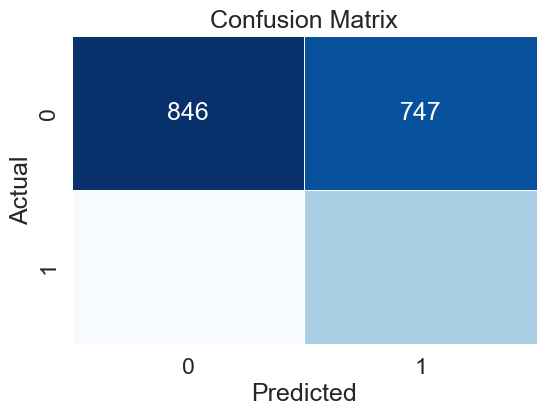

In [186]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**RandomForest Model**

In [187]:
model_rf = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01)
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(min_impurity_decrease=0.01)

In [188]:
y_pred_rf = model_rf.predict(X_test_final)

In [238]:
# Get our metrics
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_per = precision_score(y_test, y_pred_rf)
rf_rec = recall_score(y_test, y_pred_rf)

In [189]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.75      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.82      0.76      0.78      2000



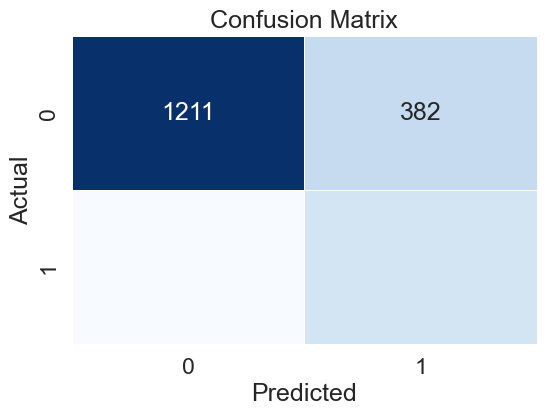

In [190]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**XGBoost Classifier**

In [191]:
model_xgboost = XGBClassifier()

In [192]:
model_xgboost.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [193]:
y_pred_xgb = model_xgboost.predict(X_test_final)

In [239]:
# Get our metrics
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_per = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

In [194]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1593
           1       0.61      0.53      0.57       407

    accuracy                           0.83      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.83      0.83      0.83      2000



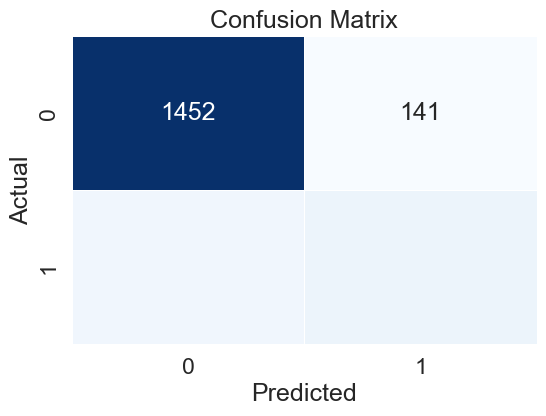

In [195]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Voting Classifier**

In [241]:
voting = VotingClassifier(estimators=[
    ('lr', lr),
    ('dt', model_dt),
    ('rf', model_rf),
    ('svc', best_model),
    ('knn', model_knn),
    ('xgb', model_xgboost),
    ('lgbm', LGBM_classifier)
])

In [242]:
voting.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2092
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000, penalty=None)),
                             ('dt',
                              DecisionTreeClassifier(class_weight={0: 1, 1: 3},
                                                     max_depth=4,
                                                     min_impurity_decrease=0.01,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(min_impurity_decrease=0.01)),
                             ('svc', SVC(C=10)),
                             ('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            c...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm', LGBMClassifier(n_estimators=200))])

In [243]:
y_pred_vote = voting.predict(X_test_final)

In [244]:
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1593
           1       0.52      0.69      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.83      0.81      0.82      2000



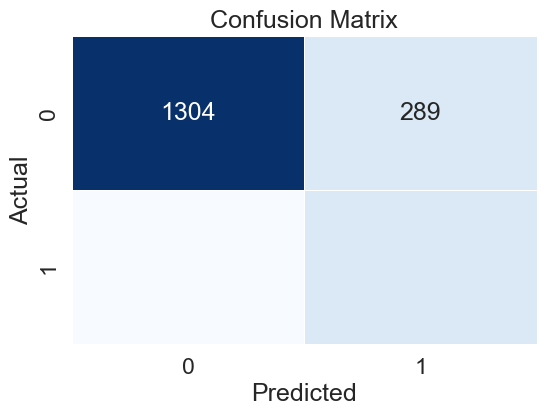

In [225]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_vote)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**LGBMClassifier**

In [204]:
# Create LGBMClassifier Model
LGBM_classifier = LGBMClassifier(n_estimators=200)
LGBM_classifier.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2092
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_estimators=200)

In [205]:
# Train score
LGBM_classifier.score(X_train_resampled, y_train_resampled)

0.9566718995290424

In [206]:
# Test score
LGBM_classifier.score(X_test_final, y_test)

0.841

In [207]:
# Get prediction
y_pred_lgbm = LGBM_classifier.predict(X_test_final)

In [208]:
# Get our metrics
lgbm_acc = accuracy_score(y_test, y_pred_lgbm)
lgbm_per = precision_score(y_test, y_pred_lgbm)
lgbm_rec = recall_score(y_test, y_pred_lgbm)

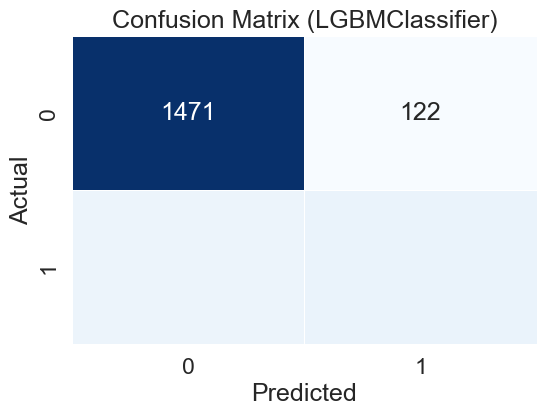

In [209]:
# Create a confusion matrix for LGBMClassifier
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (LGBMClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Evaluation**

- **`Accuracy:`**
    - Measures the overall correctness of the model (the percentage of correct predictions).
    - Accuracy is not the most important metric in imbalanced datasets, as it can be misleading. For example, predicting the majority class most of the time will give high accuracy but poor performance on the minority class (churners).


- **`Precision:`**
    - Precision answers the question: Of all the customers predicted to churn, how many actually churned?
    - High precision means fewer false positives (customers predicted to churn but actually don’t).


- **`Recall:`**
    - Recall answers the question: Of all the customers that actually churned, how many did the model correctly identify?
    - High recall means fewer false negatives (customers that churn but were predicted not to).

In [246]:
Models = ['LogisticRegression', 'SVC', 'KNN', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBoostClassifier', 'LGBMClassifier','VotingClassifier']
Accuracy = [lr_acc, svc_acc, knn_acc, dt_acc, rf_acc, xgb_acc, lgbm_acc,voting_acc]
Precision = [lr_per, svc_per, knn_per, dt_per, rf_per, xgb_per, lgbm_per,voting_per]
Recall = [lr_rec, svc_rec, knn_rec, dt_rec, rf_rec, xgb_rec, lgbm_rec,voting_rec]

models = pd.DataFrame(data={'Models': Models,'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall})
models

,Models,Accuracy,Precision,Recall
0,LogisticRegression,0.7030,0.372789,0.673219
1,SVC,0.7820,0.474870,0.673219
2,KNN,0.7445,0.418750,0.658477
3,DecisionTreeClassifier,0.5895,0.308333,0.818182
4,RandomForestClassifier,0.7580,0.443959,0.749386
5,XGBoostClassifier,0.8340,0.605042,0.530713
6,LGBMClassifier,0.8410,0.633634,0.518428
7,VotingClassifier,0.8075,0.520446,0.687961


**Let's hyperparameter tune the XGBoostClassifier Model and use it into production.**

In [247]:
# Define XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required for further split
}

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters & Model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("🚀 Best Hyperparameters:", best_params)
print(f"✅ Best Accuracy from GridSearch: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
🚀 Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
✅ Best Accuracy from GridSearch: 0.8883


In [248]:
import joblib

# Save the trained model
joblib.dump(best_xgb_model, "xgboost_model.pkl")
print("✅ Model saved as 'xgboost_model.pkl'")


✅ Model saved as 'xgboost_model.pkl'


In [250]:
# Load the saved model
loaded_model = joblib.load("xgboost_model.pkl")

# Make Predictions
y_pred = loaded_model.predict(X_test_final)
print(y_pred)
print("🚀 Model successfully loaded and used for predictions!")


[0 0 0 ... 1 0 0]
🚀 Model successfully loaded and used for predictions!


In [252]:
loaded_model.score(X_test_final,y_test)

0.8375

In [ ]:
LGBM_classifier

In [253]:
import joblib

# Save the trained model
joblib.dump(LGBM_classifier, "classifier_model.pkl")
print("✅ Model saved as 'classifier_model.pkl'")


✅ Model saved as 'classifier_model.pkl'


In [254]:
# Load the saved model
loaded_model = joblib.load("classifier_model.pkl")

# Make Predictions
y_pred = loaded_model.predict(X_test_final)
print(y_pred)
print("🚀 Model successfully loaded and used for predictions!")


[0 0 0 ... 1 0 0]
🚀 Model successfully loaded and used for predictions!
